<a href="https://colab.research.google.com/github/Vjemseena/Data-analysis-projects/blob/master/temperature_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $\color{red}{\text{Data source}}$


Climate Change: Earth Surface Temperature Data

(https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)


## $\color{red}{\text{Import required libraries}}$




In [4]:
## Data reading
from zipfile import ZipFile
import os,shutil, glob
import re

## Data analysis
import numpy as np
import pandas as pd
import pandas_profiling
import missingno as msno

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly  as py



In [5]:
df_Global=pd.read_csv("GlobalTemperatures.csv",parse_dates=['dt'])

## $\hspace{10cm}\color{red}{\text{Global Temperature analysis}}$

* We remove the null values here. One could try imputing the missing
values also. For simplicity we stick to the former approach.

* Here we create a new data frame, with date, average tempearture and LandAverageTemperatureUncertainty. So that without losing much data we can study how the global temperature behaves over the years starting from seventeenth centuary.


In [6]:
columnames=df_Global.columns.to_list()[3:]

In [7]:
df_Global["Year"]=pd.DatetimeIndex(df_Global['dt']).year
df_Global["Month"]=pd.DatetimeIndex(df_Global['dt']).month

In [8]:
df_Globalsub1=df_Global.drop(columnames,axis=1)


In [9]:
df_Globalsub1.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,Year,Month
0,1750-01-01,3.034,3.574,1750,1
1,1750-02-01,3.083,3.702,1750,2
2,1750-03-01,5.626,3.076,1750,3
3,1750-04-01,8.490,2.451,1750,4
4,1750-05-01,11.573,2.072,1750,5


In [10]:
df_Global.dropna(inplace=True)

In [11]:
df_Globalsub1.dropna(inplace=True)

In [12]:
df_Globalsub1.to_csv("global.csv")

In [13]:
df_Globalsub1.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,Year,Month
0,1750-01-01,3.034,3.574,1750,1
1,1750-02-01,3.083,3.702,1750,2
2,1750-03-01,5.626,3.076,1750,3
3,1750-04-01,8.490,2.451,1750,4
4,1750-05-01,11.573,2.072,1750,5


In [15]:
conditions = [
    (df_Globalsub1['Year'] >= 1701) & (df_Globalsub1['Year'] <= 1800 ),
    (df_Globalsub1['Year'] >= 1801) & (df_Globalsub1['Year'] <=1900 ),
    (df_Globalsub1['Year'] >= 1901) & (df_Globalsub1['Year'] <= 2000),
    (df_Globalsub1['Year'] >= 2001) & (df_Globalsub1['Year'] <= 2100),
    ]
values = ['eighteenth','nineteenth','twentieth', 'twentyfirst']

df_Globalsub1['Centuary'] = np.select(conditions, values)

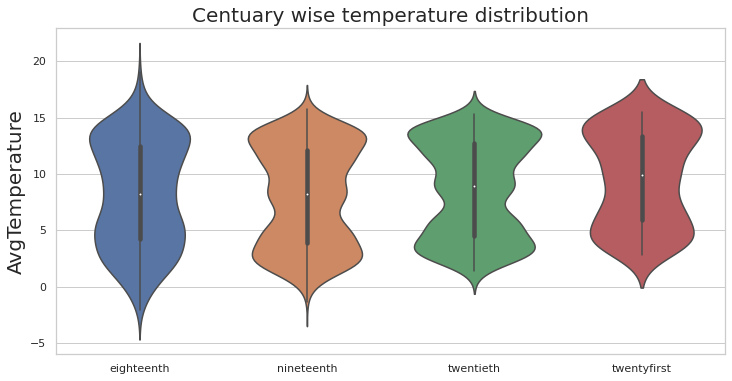

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.set(font_scale = 10)
sns.set_theme(style="whitegrid")
sns.violinplot(x="Centuary", y="LandAverageTemperature", data=df_Globalsub1)
plt.xlabel(None, size=20)
plt.ylabel("AvgTemperature", size=20)
plt.title("Centuary wise temperature distribution",size=20)
plt.show()

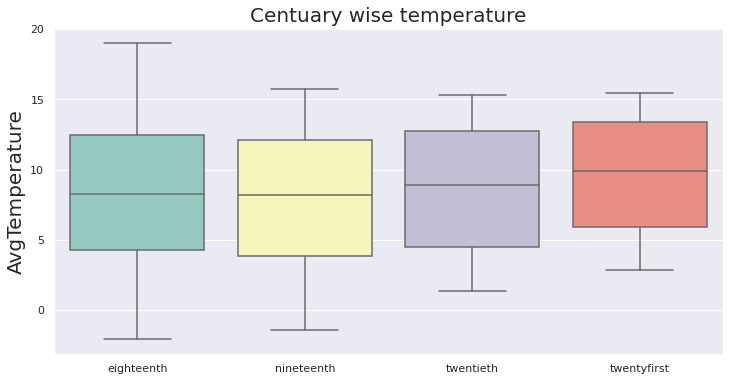

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.boxplot(x="Centuary",
            y="LandAverageTemperature",
            data=df_Globalsub1,
            palette="Set3")
plt.xlabel(None, size=20)
plt.ylabel("AvgTemperature", size=20)
plt.title("Centuary wise temperature",size=20)
plt.show()


In [18]:
df_Globalsub2=df_Globalsub1.groupby("Year",as_index=False)["LandAverageTemperature","LandAverageTemperatureUncertainty"].mean()
df_Globalsub2['upperbound']=df_Globalsub2['LandAverageTemperature']+ df_Globalsub2['LandAverageTemperatureUncertainty']
df_Globalsub2['lowerbound']=df_Globalsub2['LandAverageTemperature']- df_Globalsub2['LandAverageTemperatureUncertainty']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [19]:
df_Globalsub4=df_Globalsub1.groupby("Year",as_index=False)["LandAverageTemperature","LandAverageTemperatureUncertainty"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [20]:
df_Globalsub3=df_Globalsub2.drop("LandAverageTemperatureUncertainty",axis=1)

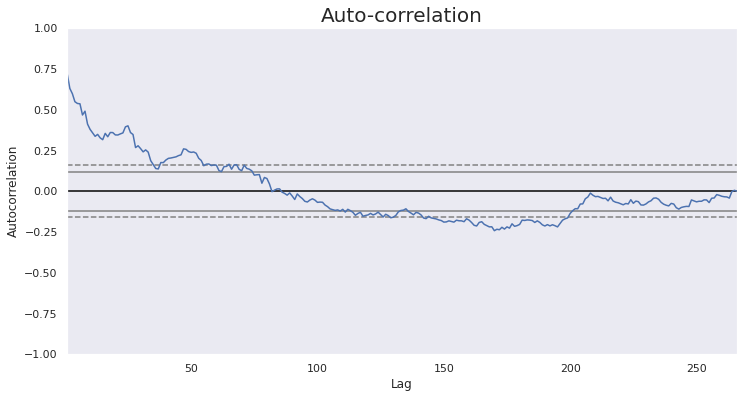

In [21]:
s1=df_Globalsub3["LandAverageTemperature"]
plt.figure(figsize=(12,6))

x = pd.plotting.autocorrelation_plot(s1)
 
x.plot()
plt.title("Auto-correlation",size=20)
plt.show()

In [22]:
m, b = np.polyfit(df_Globalsub2['Year'], df_Globalsub2['LandAverageTemperature'], 1)
fit=m*df_Globalsub2['Year'].values + b

In [23]:
df_Globalsub2

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,upperbound,lowerbound
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083
...,...,...,...,...,...
261,2011,9.516000,0.082000,9.598000,9.434000
262,2012,9.507333,0.083417,9.590750,9.423917
263,2013,9.606500,0.097667,9.704167,9.508833
264,2014,9.570667,0.090167,9.660833,9.480500


In [24]:
fig = go.Figure([
    go.Scatter(
        name='avg',
        x=df_Globalsub2['Year'].values,
        y=df_Globalsub2['LandAverageTemperature'].values,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='linear fit',
        x=df_Globalsub2['Year'].values,
        y=fit,
        mode='lines',
        line=dict(color='firebrick', width=3,dash='dash'),
    ),
        go.Scatter(
        name='Upper Bound',
        x=df_Globalsub2['Year'].values,
        y=df_Globalsub2['upperbound'].values,
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=df_Globalsub2['Year'].values,
        y=df_Globalsub2['lowerbound'].values,
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ),
])
fig.update_layout(
    yaxis_title='avg temp(\N{DEGREE SIGN}C)',
    title={
        'text': "Average global temperature over the years",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   hovermode="x"
)
fig.show()

In [25]:
df_Global1=df_Global.groupby('Year',as_index=False)["LandAverageTemperature","LandAverageTemperatureUncertainty","LandMaxTemperature","LandMaxTemperatureUncertainty","LandMinTemperature","LandMinTemperatureUncertainty"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [26]:
import plotly.graph_objects as go
list1=df_Global1["Year"].values
list2=df_Global1["LandMaxTemperature"].values
list3=df_Global1["LandMinTemperature"].values
list4=df_Global1["LandMaxTemperatureUncertainty"].values
list5=df_Global1["LandMinTemperatureUncertainty"].values
list6=df_Global1["LandAverageTemperature"].values
list7=df_Global1["LandAverageTemperatureUncertainty"].values




fig = go.Figure(data=[
    go.Bar(name='MAX', x=list1[0::15], y=list2[0::15],error_y_array=list4[0::15],marker=dict(
                     colorscale='earth')),
    go.Bar(name='MIN', x=list1[0::15], y=list3[0::15],error_y_array=list5[0::15],marker=dict( 
                     colorscale='dense')),
    go.Bar(name='average', x=list1[0::15], y=list6[0::15],error_y_array=list7[0::15],marker=dict(
                     colorscale='sunset', reversescale = True))
                      
])
# Change the bar mode
fig.update_layout(barmode='group',showlegend= True,
                      title={
        'text': "MAX,MIN,average of global temperature",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()